In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import Isomap
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib import offsetbox
%matplotlib inline

In [6]:
import pandas as pd
from sklearn.datasets import fetch_lfw_people

# Load the dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Convert the data to a DataFrame
df = pd.DataFrame(data=lfw_people.data)

# Optionally, add the target as a column
df['target'] = lfw_people.target

# Add target names if available
df['target_name'] = df['target'].map(lambda x: lfw_people.target_names[x])

df.head()


,0,1,2,3,4,5,6,7,8,9,...,1842,1843,1844,1845,1846,1847,1848,1849,target,target_name
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001307,0.000000,5,Hugo Chavez
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.155556,0.126797,0.126797,0.124183,0.135948,0.132026,0.016993,0.000000,6,Tony Blair
2,0.445752,0.414379,0.369935,0.354248,0.329412,0.260131,0.218301,0.200000,0.152941,0.121569,...,0.633987,0.647059,0.681046,0.691503,0.703268,0.715033,0.164706,0.000000,3,George W Bush
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,Colin Powell
4,0.320261,0.322876,0.120261,0.075817,0.053595,0.047059,0.048366,0.054902,0.108497,0.133333,...,0.624837,0.583007,0.644444,0.692810,0.694118,0.603922,0.363399,0.295425,0,Ariel Sharon


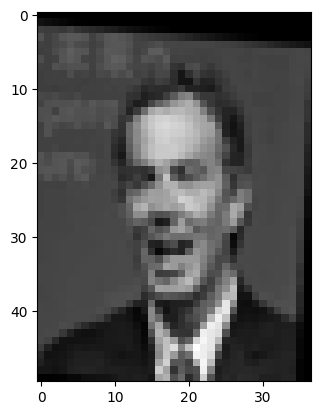

In [16]:
plt.imshow(lfw_people.images[1], cmap='gray')
plt.show()

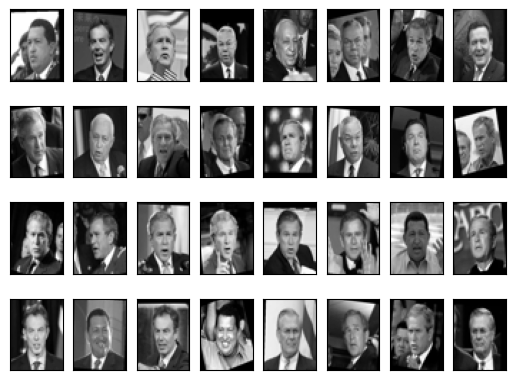

In [18]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(lfw_people.images[i], cmap='gray')

In [19]:
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    
    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
    ax.plot(proj[:, 0], proj[:, 1], '.b')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # Don't show points too close together
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


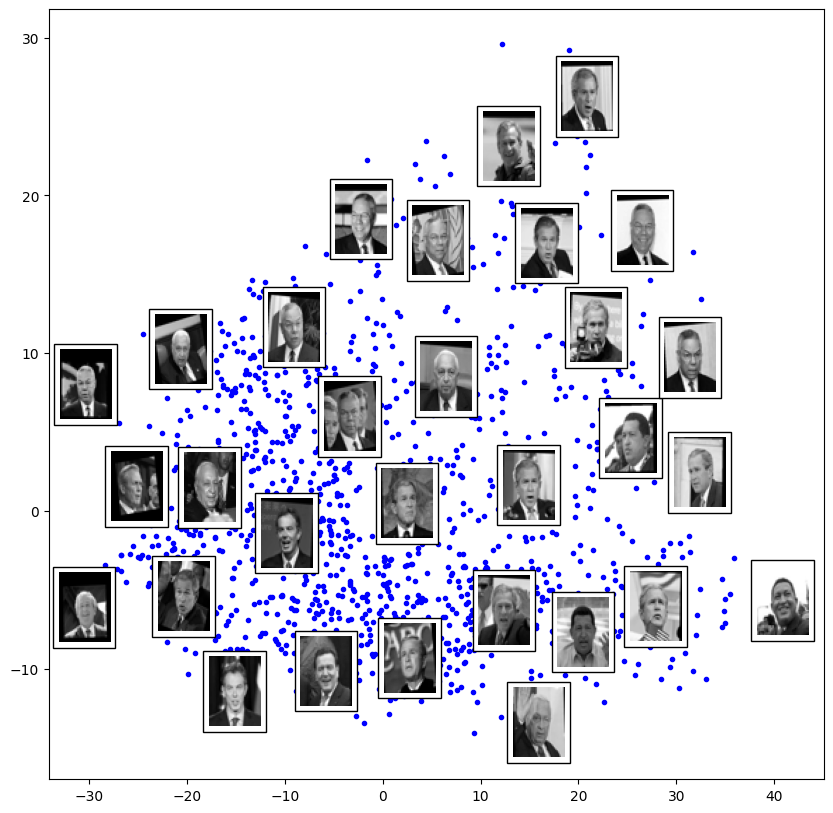

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_components(df.drop(['target_name'], axis=1),
                model=Isomap(n_components=2),
                images=lfw_people.images,
                cmap = 'gray',
                thumb_frac = .1)

/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Total features: 1851
Expected grid size: 50 x 39 = 1950


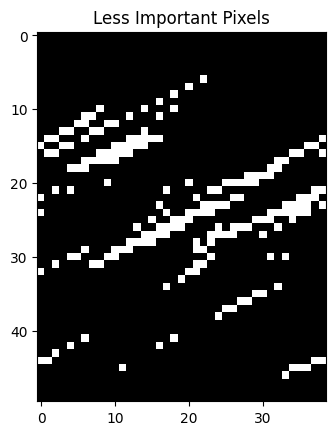

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target_name'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['target_name', 'target_encoded']),  # Drop the original non-numeric target
    df['target_encoded'],  # Use encoded target
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Ensure all features in X_train are numeric
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Replace NaNs and infinite values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_test.replace([np.inf, -np.inf], 0, inplace=True)

# Remove features with zero variance
from sklearn.feature_selection import VarianceThreshold

variance_filter = VarianceThreshold(threshold=0)
X_train = variance_filter.fit_transform(X_train)
X_test = variance_filter.transform(X_test)

# Feature selection
sel = SelectPercentile(f_classif, percentile=90)
sel.fit(X_train, y_train)

# Identify less important features (features NOT selected)
less_important_mask = ~sel.get_support()

# Debugging dimensions
print(f"Total features: {less_important_mask.size}")
print(f"Expected grid size: 50 x 39 = {50 * 39}")

# Handle mismatched dimensions for visualization
target_size = 50 * 39  # Expected grid size

if less_important_mask.size < target_size:
    # Pad if less than expected
    padded_mask = np.pad(less_important_mask, (0, target_size - less_important_mask.size), 'constant')
    less_important_pixels = padded_mask.reshape(50, 39)
elif less_important_mask.size > target_size:
    # Crop if greater than expected
    cropped_mask = less_important_mask[:target_size]
    less_important_pixels = cropped_mask.reshape(50, 39)
else:
    # Reshape directly if dimensions match
    less_important_pixels = less_important_mask.reshape(50, 39)

# Visualize less important pixels
plt.imshow(less_important_pixels, cmap='gray')
plt.title("Less Important Pixels")
plt.show()


In [56]:
pca = PCA(n_components = .9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


pca.n_components_

94

In [58]:
svc = SVC(C = 1, kernel = 'linear')
svc.fit(X_train_pca, y_train)
print("Score on reduced data :", svc.score(X_test_pca, y_test))
svc.fit(X_train, y_train)
print("Score on full data :", svc.score(X_test, y_test) )

Score on reduced data : 0.9922480620155039
Score on full data : 0.9922480620155039
